In [1]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 45.8 MB/s eta 0:00:00


In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 60.6 MB/s eta 0:00:00


In [3]:
!pip install cython
!pip install cython
!pip uninstall cartopy
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 65.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 6.7 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113626 sha256=c3b130970e965116a5f8eafd6426225e4d6d3eb3026450437822226fcd09128e
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy


In [4]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 KB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp39-cp39-linux_x86_64.whl size=979763 sha256=d52b07d0e4e24b63827e1d3786b8d98eb84f7dbb80679610843f7be2ee44eed7
  Stored in directory: /root/.cache/pip/wheels/c2/f0/2b/e33fb469c9bf8d08688be4df902af6d7c2210128fc7c046889
Successfully built shapely


In [5]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [6]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
#ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [7]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=15, ellps='WGS84', preserve_units=True)

In [8]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,2.741742e+06,831618.824330
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,2.741383e+06,832012.634456
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,2.743015e+06,833355.201667
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,2.743140e+06,830672.463351
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,2.741498e+06,830536.967666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,2.742113e+06,831235.339511
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,2.741668e+06,830350.089419
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,2.741571e+06,833420.080181
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,2.742465e+06,829895.289246


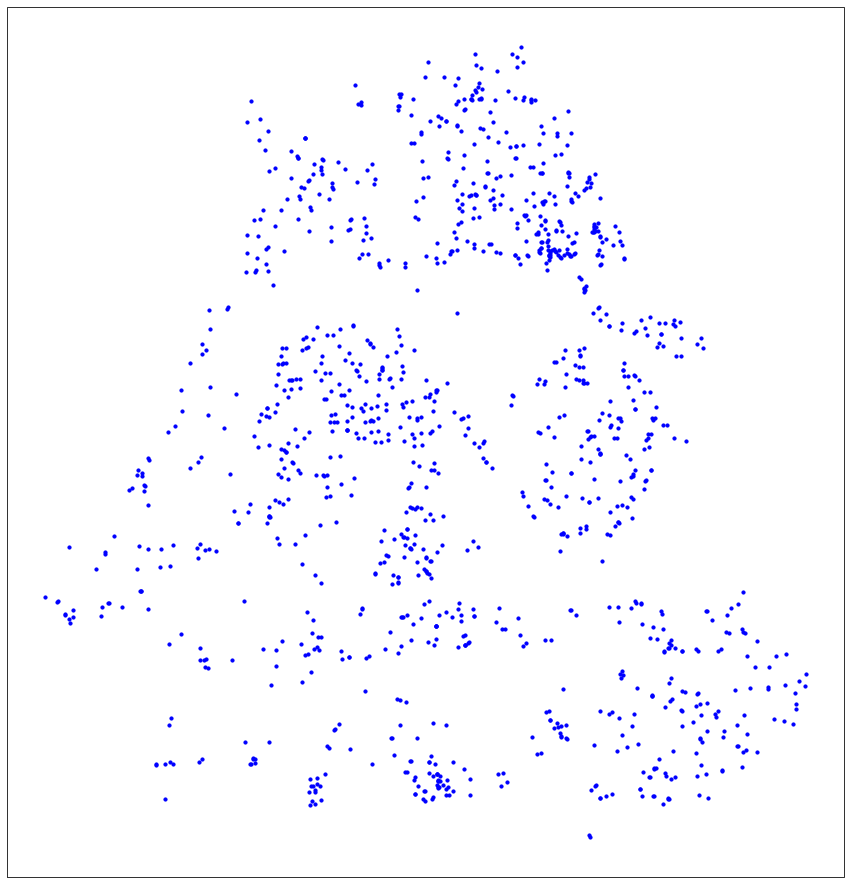

In [9]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Puntos Melbourne
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [10]:
#Se carga la cartografía de Melbourne
url = 'https://foscal.net/cartografia/'
#url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp", "68276_urbano.shx"]
#file_list = ["melbourne-metro-region.dbf", "melbourne-metro-region.prj", "melbourne-metro-region.shp", "melbourne-metro-region.shx"]
#file_list = ["UrbanExtent2015_region.dbf", "UrbanExtent2015_region.prj", "UrbanExtent2015_region.shp", "UrbanExtent2015_region.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

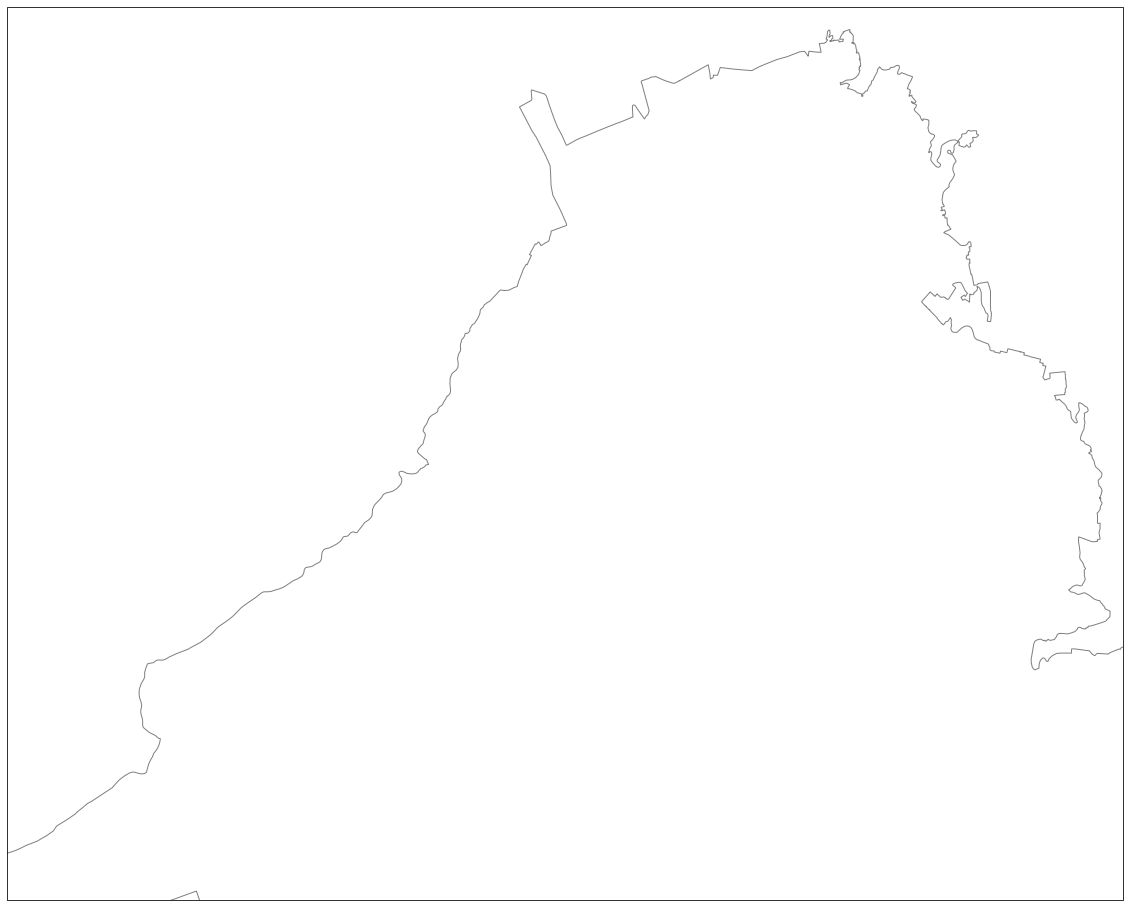

In [11]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)

# Mapa de Melbourne
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

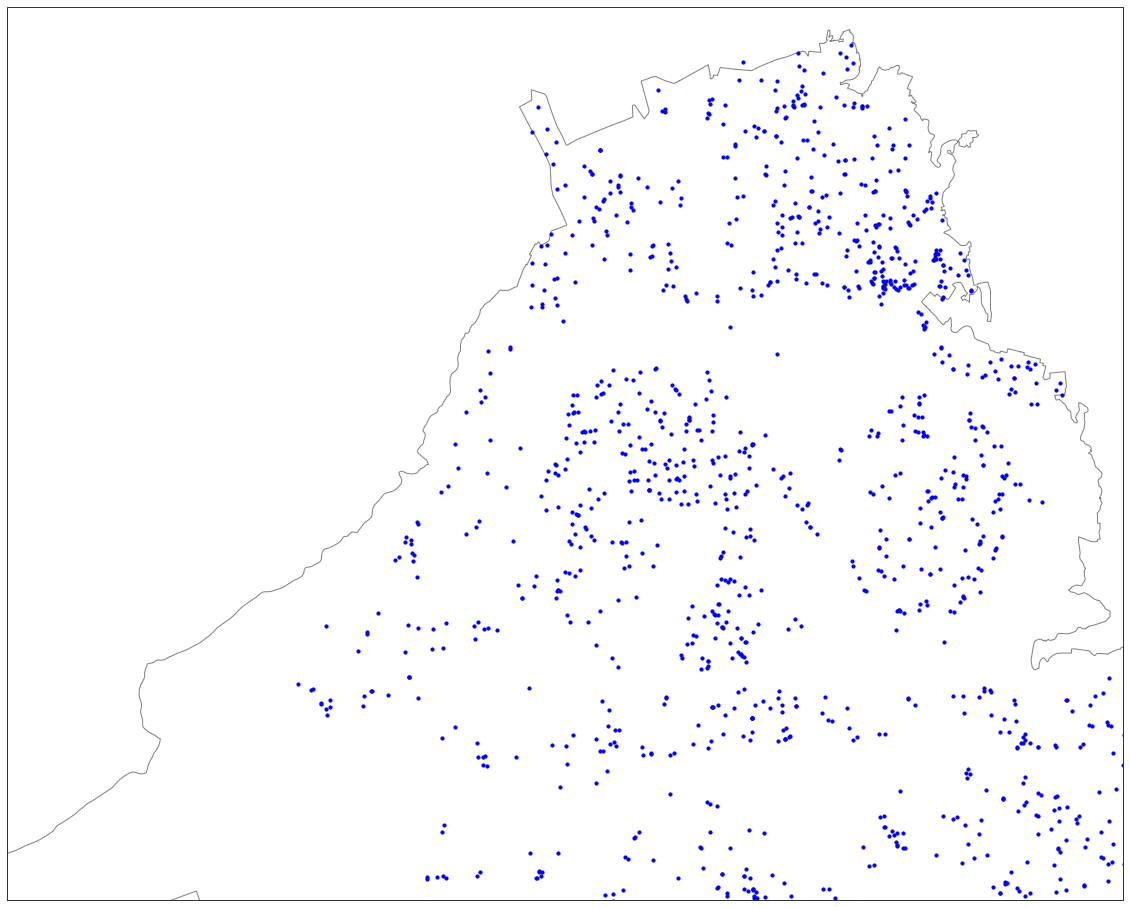

In [12]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)

# Puntos y mapa de Melbourne
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

#practica de funcion K

In [13]:
floridablanca = gpd.read_file("68276_urbano.shp")
floridablanca = floridablanca.to_crs("EPSG:32618")
area_floridablanca = floridablanca.area.sum()
print(f"El área de Floridablanca es de {area_floridablanca:.2f} metros cuadrados")


El área de Floridablanca es de 17030066.99 metros cuadrados


In [14]:
listapuntos5=[]
for i in range(df.shape[0]):
  listapuntos5.append((df["x"][i],df["y"][i]))

  

In [15]:
len(listapuntos5)

1262

In [16]:
from shapely.geometry import Point
from shapely.ops import nearest_points
from itertools import combinations

#listapuntos = [(x, y) for x, y in zip(df['x'], df['y'])]

#puntos = [Point(c) for c in listapuntos]

#parejas = list(combinations(puntos, 2))

#parejas_cercanas = []
#for p1, p2 in parejas:
    ##if p1.distance(p2) <= 100:
        #parejas_cercanas.append((p1.coords[0], p2.coords[0]))#

#len(parejas_cercanas)




In [17]:
from scipy.spatial.distance import pdist, squareform

coords = np.column_stack((df['x'], df['y']))

dist_matrix = squareform(pdist(coords))

mask = dist_matrix < 100

num_pairs = np.sum(mask) // 2 
print(num_pairs)

4257


In [18]:
def calcular_distancia(x1, y1, x2, y2):
    distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distancia

In [19]:
def funcionk(listaPuntos, area, h):
  contK=0
  for i in range(len(listaPuntos)-1):
    for j in range(i+1,len(listaPuntos)):
      if calcular_distancia(listaPuntos[i][0],listaPuntos[i][1],listaPuntos[j][0],listaPuntos[j][1])<=h:
        contK+=1
  valorK=contK*area/len(listaPuntos)**2
  return valorK 
  
funcionk(listapuntos5,area_floridablanca,100)

38772.64655741063

In [20]:

lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

import numpy as np

lower_lon, lower_lat, upper_lon, upper_lat = floridablanca.total_bounds
num_points = 1000

random_points = []
while len(random_points) < num_points:
    point = [np.random.uniform(upper_lon, lower_lon), np.random.uniform(lower_lat, upper_lat)]
    random_points.append(point)



In [21]:
def filter_points_within_polygon(polygon, points):
    filtered_points = []
    for point in points:
        if polygon.contains(Point(point)):
            filtered_points.append(point)
    return filtered_points

filtered_points = filter_points_within_polygon(floridablanca.geometry[0], random_points)

In [22]:
from shapely.geometry import Point

points_gdf = gpd.GeoDataFrame(geometry=[Point(point) for point in filtered_points])
points_gdf['id'] = range(len(points_gdf))

<Axes: >

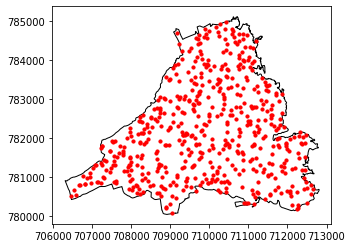

In [23]:
ax = floridablanca.plot(color='white', edgecolor='black')
points_gdf.plot(ax=ax, color='red', markersize=10)

In [24]:
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

In [25]:
import pyproj

p = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [26]:
xmin,ymin = p(lower_lon, lower_lat)
xmax, ymax = p(upper_lon, upper_lat)

#Proyecto 1 k con los percentiles




In [27]:
xmin,ymin,xmax,ymax

(706552.7316262802, 780796.0652021945, 712059.2439258386, 785242.8333012793)

In [28]:
import shapely.geometry as sg


In [ ]:
from shapely.geometry import Polygon
coordenadas = floridablanca.geometry[0]
poligono = Polygon(coordenadas)
listagruporam1=[]
for i in range(9):
    group = []
    i = 0
    while i < len(listapuntos5):
     random_easting = np.random.uniform(xmin, xmax)
     random_northing = np.random.uniform(ymin, ymax)
     point = Point(random_easting, random_northing)
    if point.within(poligono):
        group.append((random_easting, random_northing))
        i += 1
listagruporam1.append(group)

In [ ]:
df_grupo1 = pd.DataFrame(listagruporam1[0], columns=['x', 'y'])

df_grupo1['longitud'],df_grupo1['latitud']=p(df_grupo1['x'],df_grupo1['y'],inverse=True)

df_grupo1

In [ ]:
from pandas.compat import F
listaDatos=[]
for h in range(10,201,10):
    k = funcionk(listapuntos5,area_floridablanca,h)
    listak=[]
    for group in listagruporam1:
        listak.append(funcionk(group,area_floridablanca,h))
    listak.append(k)
    listak.sort()

    percentile_2_5 = np.percentile(listak, 2.5)
    percentile_97_5 = np.percentile(listak, 97.5)
    listaDatos.append([h, k,percentile_2_5, percentile_97_5])

In [ ]:
dfresultados=pd.DataFrame(listaDatos,columns=('h','k','percentile_2_5', 'percentile_97_5'))
dfresultados

In [ ]:
df = pd.DataFrame(listaDatos, columns=['h', 'k', 'percentile_2_5', 'percentile_97_5'])

# Creamos la visualización
plt.plot(df['h'], df['k'], label='k')
plt.plot(df['h'], df['percentile_2_5'], label='2.5% percentile')
plt.plot(df['h'], df['percentile_97_5'], label='97.5% percentile')
plt.xlabel('h')
plt.ylabel('Valor')
plt.legend()
plt.show()